<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%92%D0%A7_%D0%B8_%D0%90%D0%BD%D1%82%D0%B5%D0%BD%D0%BD%D1%8B_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import seaborn
import scipy.constants as const
import math
from math import cos,sin
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar,minimize,curve_fit
import scipy.special as sp

ДН в двух главных плоскостях излучающего раскрыва рупора(подписать размерности)

In [11]:
f_0 = 13.5*const.giga
lambda_0 = const.c/f_0
A = 36*const.milli
B = 28*const.milli
F_E = lambda alpha: 1/2*(1 + cos(alpha))*sin(const.pi*B/lambda_0*sin(0.8*alpha))/const.pi*B/lambda_0*sin(0.8*alpha)
F_H = lambda alpha: 0.15*const.pi**2*(0.67 + cos(alpha))*cos(const.pi*A/lambda_0*sin(alpha))/((const.pi/2)**2 - (const.pi*A/lambda_0*sin(alpha))**2)
alpha = np.linspace(-const.pi,const.pi,1000)

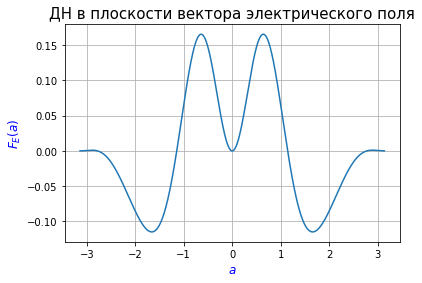

In [12]:
plt.plot(alpha, list(map(F_E,alpha)), label='$F_E(\alpha)$')
plt.title("ДН в плоскости вектора электрического поля", fontsize=15)
plt.xlabel('$a$', fontsize=12, color='blue')
plt.ylabel('$F_E(a)$', fontsize=12, color='blue')
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')


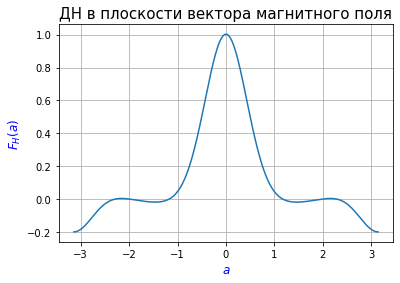

In [13]:
plt.plot(alpha, list(map(F_H,alpha)), label='$F_E(\alpha)$')
plt.title("ДН в плоскости вектора магнитного поля", fontsize=15)
plt.xlabel('$a$', fontsize=12, color='blue')
plt.ylabel('$F_H(a)$', fontsize=12, color='blue')
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')

График распределения амлитуд поля в излучающем раскрыве зеркала вдоль вертикального и горизонтального диаметров

In [14]:
R = 185*const.milli
F = 195*const.milli
alpha = lambda r: math.atan((r/R)/(F/R - (r/R)**2*R/(4*F)))
A_E = lambda r: (1 + cos(alpha(r)))/4*F_E(alpha(r))
A_H = lambda r: (1 + cos(alpha(r)))/4*F_H(alpha(r))
#A = lambda r: A_E(r) + A_H(r) 
r = np.linspace(0,R,1000)

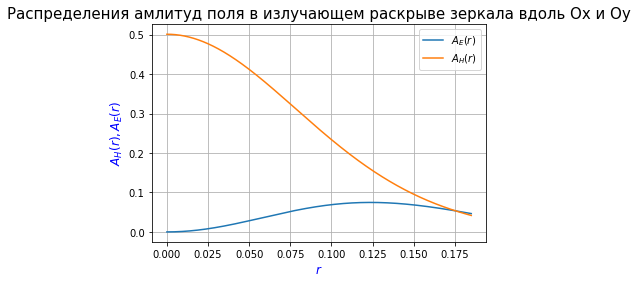

In [15]:
data_A_E = list(map(A_E,r))
data_A_H = list(map(A_H,r))
plt.plot(r, data_A_E, label='$A_E(r)$')
plt.plot(r, data_A_H, label='$A_H(r)$')
plt.title("Распределения амлитуд поля в излучающем раскрыве зеркала вдоль Ox и Оу", fontsize=15)
plt.xlabel('$r$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$A_H(r),A_E(r)$', fontsize=12, color='blue')
plt.grid(True)

Аппроксимируем функцию распределения амплитуд

In [16]:
data_A_E = np.array(data_A_E)
data_A_H = np.array(data_A_H)
data_A = data_A_E + data_A_H
#len(data_A),len(r)

In [28]:
a_0 = A_E(R) + A_H(R)
A_prime = lambda r,p: a_0 + (1 - a_0)*(1 - (r/R)**2)**p
#opt_A_prime = lambda x,a: A_prime(x,a)
#min_func = lambda p: data_A - np.array([A_prime(p,i) for i in r])
#min_func = lambda p: data_A -  a_0 + (1 - a_0)*p
p = curve_fit(A_prime,r,data_A)
#min_func(1)
#round(p[0][0],0)
p

(array([13.06543339]), array([[0.3084779]]))

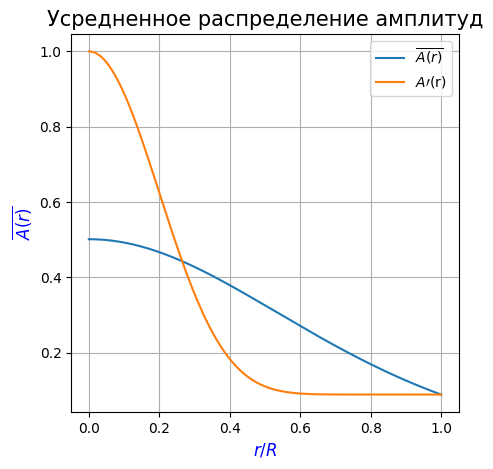

In [29]:
plt.figure(figsize=(5,5),dpi = 100)
plt.plot(r/R, data_A, label='$\overline{A(r)}$')
plt.plot(r/R, A_prime(r,round(p[0][0],0)), label='$A\prime$(r)')
plt.title("Усредненное распределение амплитуд", fontsize=15)
plt.xlabel('$r/R$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$\overline{A(r)}$', fontsize=12, color='blue')
plt.grid(True)

Построение разностной и суммарной ДН антенны

In [40]:
lmbda = lambda nu,u: round(abs(sp.lmbda(nu,u)[0][nu]*1e3),0)#лямбда функция
u = lambda theta: 2*const.pi*R/lambda_0*sin(theta)
#lmbda(4,3.8)
E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda(round(p[0][0],0),u(theta))
#round(abs(sp.lmbda(4,3.8)[0][4]*1e3),0)
theta = np.linspace(-30,30,1000)
list(map(A_E,r))

IndexError: ignored

In [35]:
plt.figure(figsize=(5,5),dpi = 100)
plt.plot(theta, list(map(E_sum_theta,theta)), label='$\overline{A(r)}$')
plt.title("Усредненное распределение амплитуд", fontsize=15)
plt.xlabel('$r/R$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$\overline{A(r)}$', fontsize=12, color='blue')
plt.grid(True)

IndexError: ignored

<Figure size 500x500 with 0 Axes>